<a href="https://colab.research.google.com/github/daniel-usp/FIA/blob/main/Clusters/K_Means_FIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Caso dos Supermercados

In [ ]:
#Ler o banco de dados
import pandas as pd
import matplotlib.pyplot as plt

fonte = 'https://raw.githubusercontent.com/daniel-usp/LIT/master/Supermercados.csv'
df = pd.read_csv(fonte)

df = df[['Vendas','Empregados']]
df.head()

# Importando a biblioteca Plotly
import plotly.express as px

# Criando o gráfico de dispersão
fig = px.scatter(df, x='Empregados', y='Vendas')

# Mostrando o gráfico
fig.show()

#Normalização


In [ ]:
from sklearn.preprocessing import StandardScaler

#Colunas de dataframe df que são categóricas
is_dummy = df.nunique() == 2
dummy_columns = df.columns[is_dummy]

#Padronização das features X com StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled[dummy_columns] = df[dummy_columns]
df_scaled

,Vendas,Empregados
0,-1.019539,-1.136544
1,-1.043794,-1.562677
2,-0.504168,0.308701
3,-0.066000,0.470110
4,1.047651,1.190443
5,1.585850,0.729968


In [ ]:
from sklearn.cluster import KMeans
#Colocar o número de clusters
n_clusters = 3
kmeans = KMeans(n_clusters)
df = df_scaled
kmeans.fit(df)
resultados = kmeans.labels_

final = df.assign(Clusters=resultados)
final

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Vendas,Empregados,Clusters
0,-1.019539,-1.136544,2
1,-1.043794,-1.562677,2
2,-0.504168,0.308701,1
3,-0.066000,0.470110,1
4,1.047651,1.190443,0
5,1.585850,0.729968,0


In [ ]:
final.groupby('Clusters').mean()

,Vendas,Empregados
Clusters,,
0,1.316751,0.960205
1,-0.285084,0.389405
2,-1.031666,-1.349611


In [ ]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go


def inertia(df, k):
    errors = [KMeans(n_clusters=i).fit(df).inertia_ for i in range(1, k+1)]
    return pd.Series(errors)

errors = inertia(df_scaled, 5)  # Exemplo com k variando de 1 a 10


def plot_elbow(errors):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(1, len(errors)+1)), y=errors, mode='lines+markers'))
    fig.update_layout(title='Método do Cotovelo',
                      xaxis=dict(title='Número de Clusters', tickmode='linear', dtick=1),
                      yaxis=dict(title='Erro'))
    fig.show()

# Utilize a função elbow_method para obter a lista de erros
errors = inertia(df_scaled, 5)  # Exemplo com k variando de 1 a 10

# Chame a função plot_elbow para plotar o gráfico
plot_elbow(errors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

## Caso Desempenho

In [ ]:
fonte = 'https://raw.githubusercontent.com/daniel-usp/LIT/master/500MM.csv'
df = pd.read_csv(fonte,sep = ";", decimal =',')
df = df.iloc[:,1:]
df

,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral
0,47855158,21.938,1.0756,52.484
1,13531695,10.528,1.2175,54.189
2,7696136,7.836,0.4218,55.977
3,7256514,14.137,0.6093,38.128
4,7055807,10.649,0.6162,66.055
5,6405875,16.643,1.2257,51.256
6,5543249,17.482,0.3515,32.145
7,5403555,18.879,0.8971,71.653
8,5095290,20.971,0.7832,86.562
9,4951187,5.577,0.6144,57.644


In [ ]:
from sklearn.preprocessing import StandardScaler

#Colunas de dataframe df que são categóricas
is_dummy = df.nunique() == 2
dummy_columns = df.columns[is_dummy]

#Padronização das features X com StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled[dummy_columns] = df[dummy_columns]
df_scaled

,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral
0,6.580699,0.489497,0.667019,-0.284352
1,1.431147,-0.306732,1.044635,-0.162533
2,0.555638,-0.494589,-1.072832,-0.034785
3,0.489681,-0.054883,-0.573869,-1.310054
4,0.459569,-0.298288,-0.555507,0.685264
5,0.362060,0.119994,1.066456,-0.372089
6,0.232640,0.178542,-1.259910,-1.737525
7,0.211681,0.276030,0.192006,1.085228
8,0.165432,0.422017,-0.111097,2.150441
9,0.143813,-0.652230,-0.560297,0.084318


In [ ]:
from sklearn.cluster import KMeans
#Colocar o número de clusters
n_clusters = 3
kmeans = KMeans(n_clusters)
df = df_scaled
kmeans.fit(df)
resultados = kmeans.labels_

final = df.assign(Clusters=resultados)
final



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral,Clusters
0,6.580699,0.489497,0.667019,-0.284352,1
1,1.431147,-0.306732,1.044635,-0.162533,2
2,0.555638,-0.494589,-1.072832,-0.034785,2
3,0.489681,-0.054883,-0.573869,-1.310054,2
4,0.459569,-0.298288,-0.555507,0.685264,0
5,0.362060,0.119994,1.066456,-0.372089,2
6,0.232640,0.178542,-1.259910,-1.737525,2
7,0.211681,0.276030,0.192006,1.085228,0
8,0.165432,0.422017,-0.111097,2.150441,0
9,0.143813,-0.652230,-0.560297,0.084318,2


In [ ]:
final.groupby('Clusters').mean()

,Vendas,Rentabilidade,Liquidezgeral,Endividamentogeral
Clusters,,,,
0,-0.173944,0.579256,-0.102007,0.656883
1,6.580699,0.489497,0.667019,-0.284352
2,-0.093004,-0.623787,0.078465,-0.672405


In [ ]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go


def inertia(df, k):
    errors = [KMeans(n_clusters=i).fit(df).inertia_ for i in range(1, k+1)]
    return pd.Series(errors)

errors = inertia(df_scaled, 5)  # Exemplo com k variando de 1 a 10


def plot_elbow(errors):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(1, len(errors)+1)), y=errors, mode='lines+markers'))
    fig.update_layout(title='Método do Cotovelo',
                      xaxis=dict(title='Número de Clusters', tickmode='linear', dtick=1),
                      yaxis=dict(title='Erro'))
    fig.show()

# Utilize a função elbow_method para obter a lista de erros
errors = inertia(df_scaled, 5)  # Exemplo com k variando de 1 a 10

# Chame a função plot_elbow para plotar o gráfico
plot_elbow(errors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

#Simulação de contas de clientes de um banco

In [1]:
import numpy as np
import pandas as pd

# Definindo uma semente para reprodutibilidade
np.random.seed(42)

# Número de dados
n_data = 500

# Gerando dados simulados
saldos = np.concatenate([
    np.random.normal(1000, 200, n_data // 3),  # Grupo com saldo médio
    np.random.normal(5000, 500, n_data // 3),  # Grupo com saldo alto
    np.random.normal(100, 50, n_data // 3)    # Grupo com saldo baixo
])

tipos_de_conta = np.concatenate([
    np.random.choice(["Corrente", "Poupança"], n_data // 3),
    np.random.choice(["Investimento"], n_data // 3),
    np.random.choice(["Corrente", "Poupança"], n_data // 3)
])

# Criando o DataFrame
df = pd.DataFrame({
    'Saldo': saldos,
    'Tipo de Conta': tipos_de_conta
})

df.head()


,Saldo,Tipo de Conta
0,1099.342831,Corrente
1,972.347140,Corrente
2,1129.537708,Poupança
3,1304.605971,Poupança
4,953.169325,Poupança


In [3]:
!pip install kmodes

In [4]:
from kmodes.kprototypes import KPrototypes

# Definindo o número de clusters
k = 3

# Instanciando o modelo K-prototypes
kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0)

# A coluna 'Saldo' é a coluna numérica (índice 0) e 'Tipo de Conta' é categórica (índice 1)
clusters = kproto.fit_predict(df, categorical=[1])

# Adicionando os clusters ao DataFrame
df['Cluster'] = clusters

df.head()


,Saldo,Tipo de Conta,Cluster
0,1099.342831,Corrente,1
1,972.347140,Corrente,1
2,1129.537708,Poupança,1
3,1304.605971,Poupança,1
4,953.169325,Poupança,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Saldo'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Saldo'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['Tipo de Conta'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['Saldo', 'Tipo de Conta'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_4, *['Cluster', 'Saldo', 'Tipo de Conta'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['Cluster', 'count()', 'Tipo de Conta'], **{})
chart

         count         mean         std          min          25%  \
Cluster                                                             
0        167.0   102.190427   58.044748   -15.096058    62.379068   
1        165.0   991.915075  183.284642   602.486217   864.615600   
2        166.0  5045.699450  498.618829  3379.366330  4677.812430   

                 50%          75%          max  
Cluster                                         
0          99.049190   132.876212   476.050979  
1         997.300555  1102.653487  1492.648422  
2        5052.628328  5342.591693  6926.365745  
Cluster  Tipo de Conta
0        Corrente         0.544910
         Poupança         0.455090
1        Poupança         0.527273
         Corrente         0.472727
2        Investimento     1.000000
Name: Tipo de Conta, dtype: float64


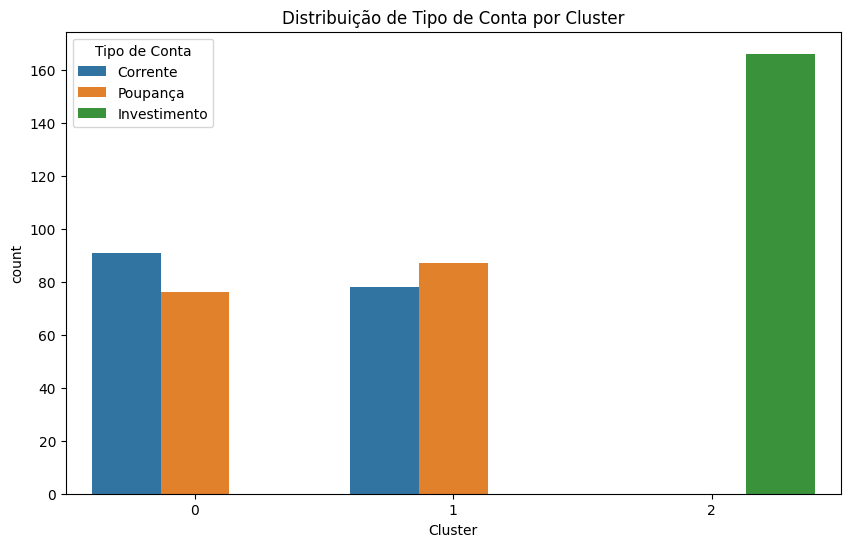

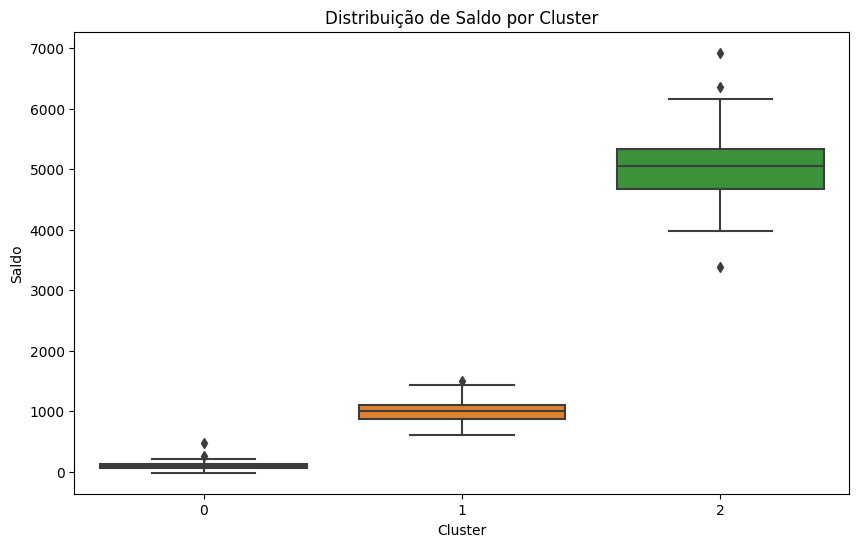

In [7]:
# 1. Estatísticas descritivas para variáveis numéricas:
print(df.groupby('Cluster')['Saldo'].describe())

# 2. Distribuição das categorias para variáveis categóricas:
print(df.groupby('Cluster')['Tipo de Conta'].value_counts(normalize=True))

# 3. Visualização:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para mostrar a distribuição de "Tipo de Conta" em cada cluster
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Tipo de Conta')
plt.title('Distribuição de Tipo de Conta por Cluster')
plt.show()

# Boxplot para mostrar a distribuição de "Saldo" em cada cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cluster', y='Saldo')
plt.title('Distribuição de Saldo por Cluster')
plt.show()

